<a href="https://colab.research.google.com/github/anna985/pml-1/blob/master/course/Problem027_NNPlus/027.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Convolutional Neural Networks (CNN)

## TBD Doing better on Fashion MNIST dataset using CNN

In [1]:
from keras.datasets import fashion_mnist

#Fashion MNIST is already organized into training/testing splits 
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


# TBD: Use following architecture to classify fashion MNIST dataset
# activation function is relu for all layers except last where its softmax

# 1 Convolutional Layer (filters = 64, kernel_size = 4 )
# 2 Convolutional Layer (filters = 64, kernel_size = 4)
# 3 Max Pooling Layer (size 2)
# 4 Convolutional Layer (filters = 128, kernel_size = 3)
# 5 Convolutional Layer (filters = 128, kernel_size = 3)
# 6 Max Pooling Layer (size 2)
# 7 Dense Layer (64 neurons)
# 8 Dense Layer (10 neurons, activation = softmax)


4423680/4422102 [==============================] - 0s 0us/step


In [2]:
IMG_ROWS = 28
IMG_COLS = 28
NUM_CLASSES = 10
TEST_SIZE = 0.2
RANDOM_STATE = 2018
#Model
NO_EPOCHS = 50
BATCH_SIZE = 128

In [4]:
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D

# Model
model = Sequential()

# first CONV => RELU => CONV => RELU => POOL layer set
model.add(Conv2D(64, kernel_size=(4, 4),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=(IMG_ROWS, IMG_COLS, 1)))
model.add(Conv2D(64, kernel_size=(4, 4),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# second CONV => RELU => CONV => RELU => POOL layer set
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Dense(64, activation='relu'))
model.add(Dense(NUM_CLASSES, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 25, 25, 64)        1088      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 22, 22, 64)        65600     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 9, 9, 128)         73856     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 7, 7, 128)         147584    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
dense_2 (Dense)              (None, 3, 3, 64)         

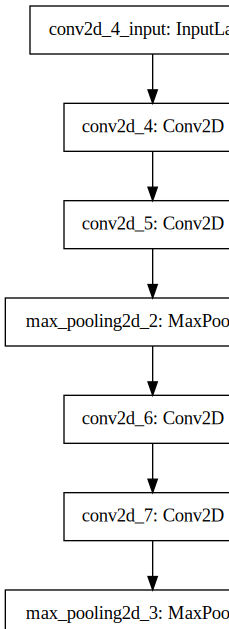

In [5]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

plot_model(model, to_file='model.png')
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [17]:
# if we are using "channels first" ordering, then reshape the design
# matrix such that the matrix is:
# 	num_samples x depth x rows x columns
from tensorflow.keras import backend as K
if K.image_data_format() == "channels_first":
	X_train = X_train.reshape((X_train.shape[0], 1, 28, 28))
	X_test = X_test.reshape((X_test.shape[0], 1, 28, 28))
 
# otherwise, we are using "channels last" ordering, so the design
# matrix shape should be: num_samples x rows x columns x depth
else:
	X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
	X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

In [18]:
# prepare the data
from tensorflow.keras.utils import to_categorical
# scale data to the range of [0, 1]
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# one-hot encode the training and testing labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

#“T-shirt/top”: [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
#“bag”: [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

# initialize the label names
labelNames = ["top", "trouser", "pullover", "dress", "coat",
	"sandal", "shirt", "sneaker", "bag", "ankle boot"]

In [ ]:
# initialize the number of epochs to train for, base learning rate,
# and batch size
NUM_EPOCHS = 25
INIT_LR = 1e-2
BS = 32

from tensorflow.keras.optimizers import SGD

# initialize the optimizer and model
# model initialized and compiled with the Stochastic Gradient Descent (SGD ) optimizer and learning rate decay
print("[INFO] compiling model...")
opt = SGD(lr=INIT_LR, momentum=0.9, decay=INIT_LR / NUM_EPOCHS)
#model = MiniVGGNet.build(width=28, height=28, depth=1, classes=10)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])

# train the network
print("[INFO] training model...")
H = model.fit(x=X_train, y=y_train,
	validation_data=(X_test, y_test),
	batch_size=BS, epochs=NUM_EPOCHS)

## Recurrent Neural Networks(RNNs) 

## Sequence Prediction

## Simple RNN

In [ ]:
import pandas as pd
import matplotlib.pylab as plt

timeseries = pd.read_csv('https://raw.githubusercontent.com/numenta/NAB/master/data/artificialNoAnomaly/art_daily_no_noise.csv')

# TBD: Use a single layer single neuron RNN to make single step prediction for above timeseries 



## Deep RNN

In [ ]:
# TBD: Use following RNN architecture to make single step prediction for given timeseries 
# Layer1 (10 Neurons)
# Layer2 (10 Neurons)
# Layer3 (1 Neurons) Output Layer

## Deep RNN (Multi step prediction)

In [ ]:
# TBD: Use following RNN architecture to make multi step prediction (5) for given timeseries 
# Layer1 (20 Neurons)
# Layer2 (20 Neurons)
# Layer3 (10 Neurons)
# Layer3 (5 Neurons) Output Layer